Matplotlib обеспечивает кроссплатформенную реализацию. Совместим с большим числом ОС и обеспечивает различные форматы вывода. Интерфейс библиотечки заметно устарел, поэтому ее полезно использовать там, где не требуется сильный ux/ui, но необходима определенная надежность.

api matplotlib позволяет адаптировать вывод к таким пакетам как Seaborn, ggplot, HoloViews, Altair.

In [1]:
import matplotlib.pyplot as plt

##  Настройка стилей

plt.style

Будем использовать классический стиль, по ходу ноута оптимизируя его.

In [2]:
plt.style.use('classic')

## Три контекста построения графиков

### Построение графиков из сценария

Функция plt.show() запускает цикл ожидания события, ищет все активные на данный момент объекты графиков и открывает одно или несколько интератктивных окон для отображения.

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

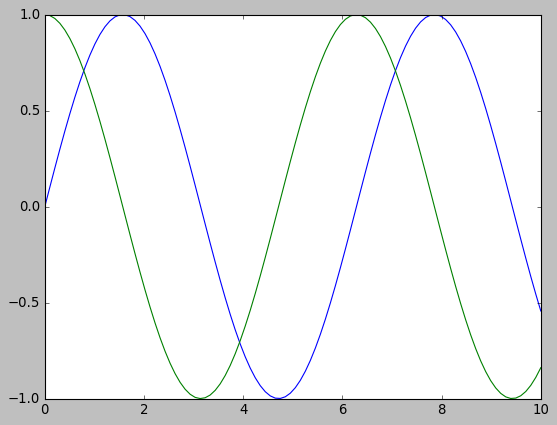

In [4]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

Если такой сценарий поместить в отдельный файл, то его запуск приведет к открытию граф.оболочки системы с отображением графика.

plt.show() используется однократно в процессе выполнения сценария, чаще всего его помещают в конце ф-ла сценария. Выполнение нескольких plt.show() в одном сценарии может привести к непредсказуемому результату.

### Построение графиков из командной оболочки iPython

задается с помощью %matplotlibe После этого любой plot приводит к открытию окна графика в оболочке. При этом некоторые модификации графиков доступны только через plt.draw(). plt.show() не обязателен, однако вывод опять таки пойдет во внешний граф.интерпретатор.

In [5]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [6]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Построение графиков из блокнота iPython

%matplotlib notebook включает динамические графики

%matplotlib inline статические

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

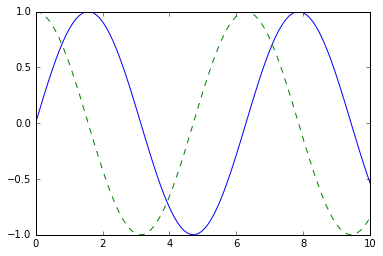

In [8]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

## Сохранение в файл

In [9]:
fig.savefig('output/my_figure.png')

In [10]:
!ls -lh output/my_figure.png

-rw-rw-r-- 1 konstantin konstantin 26K Oct 26 20:18 output/my_figure.png


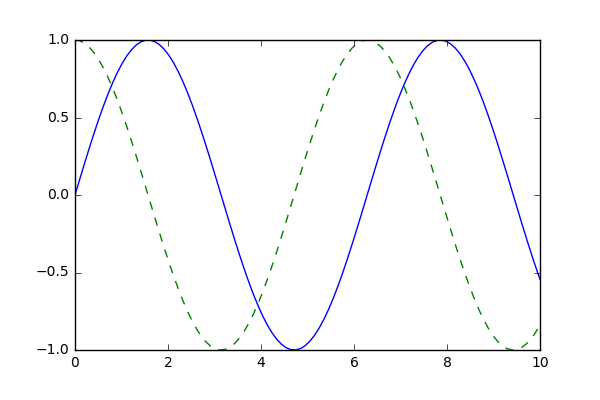

In [11]:
# можно отобразить. Это .png в данном дефолтном случае
from IPython.display import Image
Image('output/my_figure.png')

In [12]:
# список поддерживаемых форматов (специфичен к системе)
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Два интерфейса отображения

### MATLAB стиль

Такой интерфейс сохраняет состояние . Отслеживается текущий рисуноки оси координат для него. Для него выполняются все plt. Такой подход сложен для отображения нескольких рисунков и для перехода между ними

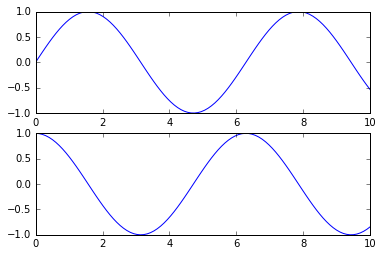

In [13]:
plt.figure()
# первая область и ее текущая ось
plt.subplot(2, 1, 1) # rows, columns, panel number
plt.plot(x, np.sin(x))
# вторая область и ее текущая ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

### ООП стиль

В этом случае определяются методы явным образом определяемых объектов Figure и Axes

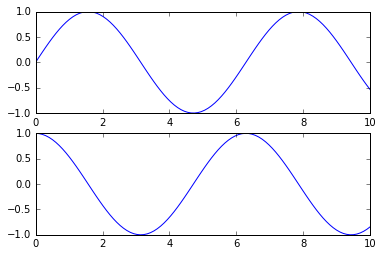

In [14]:
# Создадим сетку графиков
fig, ax = plt.subplots(2)

# вызовем метод plot() соответствующего объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## Простые линейные графики

In [16]:
plt.style.use('seaborn-whitegrid')

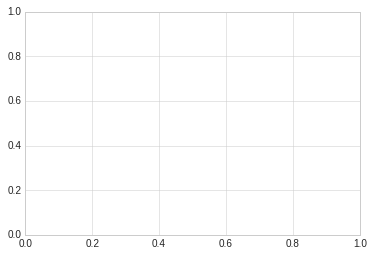

In [18]:
fig = plt.figure()
ax = plt.axes()

В данном случае figure() - единый контейнер для рисунка, содержащий все объекты, включая систему координат, графику, текст и метки. axes() - экземпляр системы координат, создающая оси

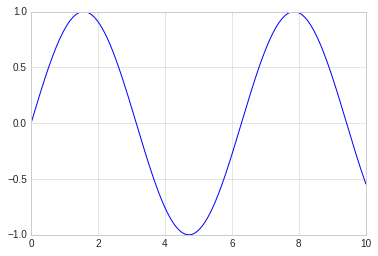

In [19]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

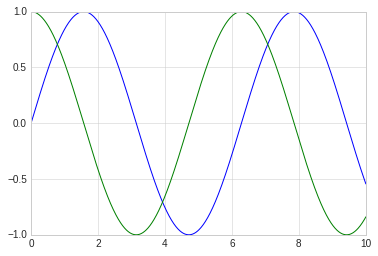

In [23]:
# можно вызвать несколько ф-й
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

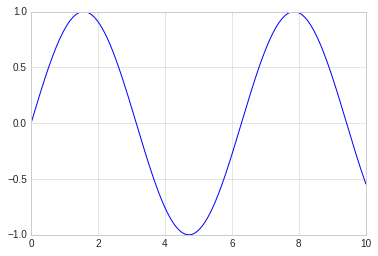

In [20]:
# в матлаб.стиле - отслеживая и изменяя единственный объект для программы
plt.plot(x, np.sin(x))

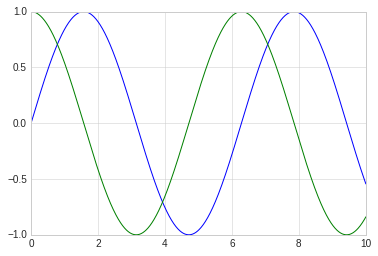

In [21]:
# можно вызвать несколько раз разные функции
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Цвета и линии

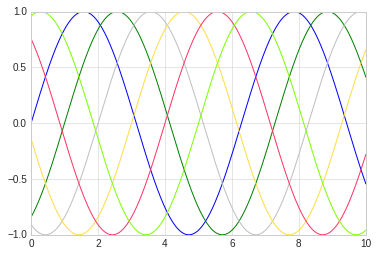

In [25]:
# цвет
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x - 0), color='blue') # по названию
ax.plot(x, np.sin(x - 1), color='g') # по краткому коду (rgbcmyc)
ax.plot(x, np.sin(x - 2), color='0.75') # по шкале оттенков серого
ax.plot(x, np.sin(x - 3), color='#FFDD44') # по шестнадцатиричному коду
ax.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.4)) # по кортежу RGB
ax.plot(x, np.sin(x - 5), color='chartreuse') # по названию из HTML-спецификации

Если цвет не задан, библиотечка задаст сама.

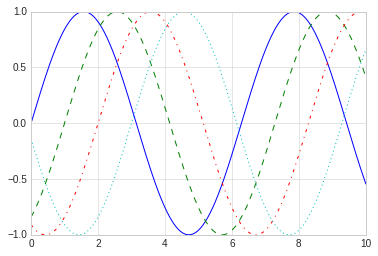

In [27]:
# стиль
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0), linestyle='solid')
ax.plot(x, np.sin(x - 1), linestyle='dashed')
ax.plot(x, np.sin(x - 2), linestyle='dashdot')
ax.plot(x, np.sin(x - 3), linestyle='dotted')

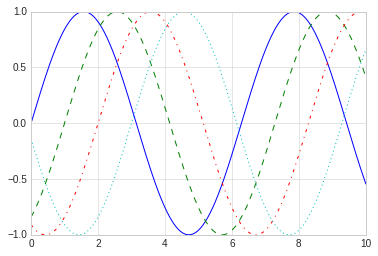

In [28]:
# или так
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0), linestyle='-')
ax.plot(x, np.sin(x - 1), linestyle='--')
ax.plot(x, np.sin(x - 2), linestyle='-.')
ax.plot(x, np.sin(x - 3), linestyle=':')

Методы задания цвета и стиля можно задать, если они краткие

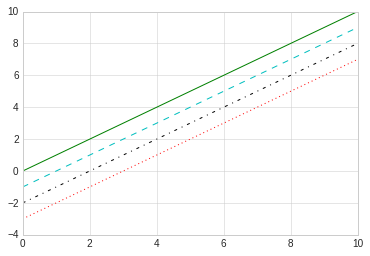

In [30]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, x - 0, '-g')
ax.plot(x, x - 1, '--c')
ax.plot(x, x - 2, '-.k')
ax.plot(x, x - 3, ':r')

### Пределы осей координат

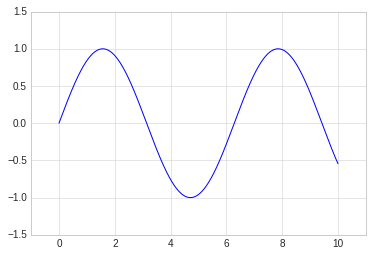

In [45]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)
ax.plot(x, np.sin(x - 0))

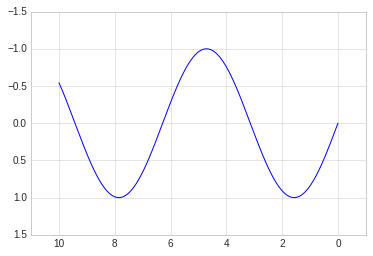

In [46]:
# зеркально
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(11, -1)
ax.set_ylim(1.5, -1.5)
ax.plot(x, np.sin(x - 0))

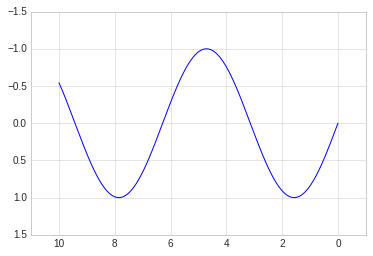

In [48]:
# одним кусом
fig = plt.figure()
ax = plt.axes()
ax.axis([11, -1, 1.5, -1.5])
ax.plot(x, np.sin(x - 0))

(0.0, 10.0, -0.9999972954811321, 0.9999996994977832)

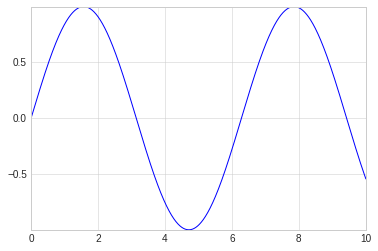

In [49]:
# автоподгонка
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0))
ax.axis('tight')

(0.0, 10.0, -1.0, 1.0)

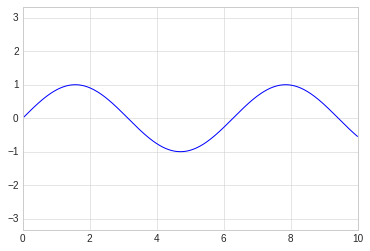

In [50]:
# подгонка под масштаб
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0))
ax.axis('equal')

## Метки

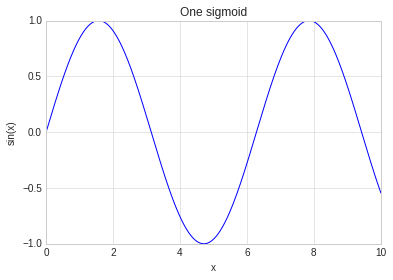

In [51]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('One sigmoid')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, np.sin(x - 0))

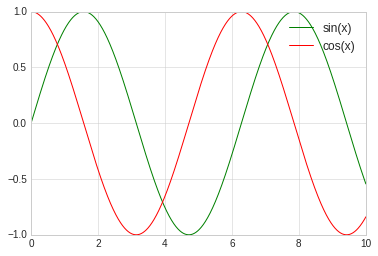

In [44]:
# легенда графика
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), '-r', label='cos(x)')
ax.legend()

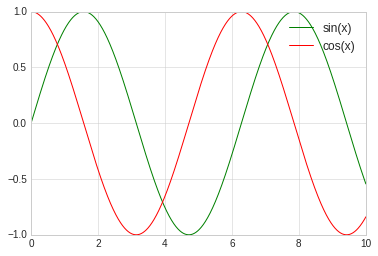

In [52]:
# естественно все тоже самое доступно через plot
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), '-r', label='cos(x)')
plt.legend()

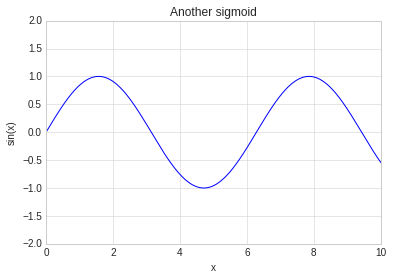

In [54]:
# кроме того, все опции доступны через ax.set()
fig = plt.figure()
ax = plt.axes()
ax.set(xlim=(0, 10), ylim=(-2, 2),
      xlabel='x', ylabel='sin(x)',
      title='Another sigmoid')
ax.plot(x, np.sin(x - 0))